# Images: loading and indexing

In [1]:
## Setup

# Import all packages for the workshop
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy.ndimage as sn

# Load example image
A = mpimg.imread("bw.png")
A = np.mean(A, axis=2)

ImportError: DLL load failed: The specified module could not be found.

Slice indexing for cropping.

```{image} slice_exercise.png
:width: 200px
```

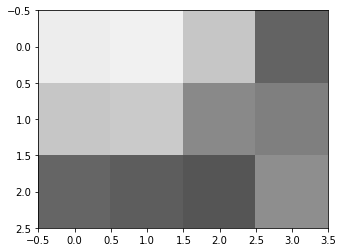

In [20]:
# Adjust these index values to get the red box
left = 2
right = 6
top = 4
bottom = 7

plt.imshow( A[top:bottom, left:right], 
            cmap=plt.get_cmap('Greys_r'))

# NB This line ensures that the colour scaling remains consistent regardless of cropping
plt.clim(np.amin(A), np.amax(A))

# Thresholding

Write a function that takes two inputs: a grayscale image, and a threshold value. Your function should then return the x and y co-ordinates of the largest blob in that image.

In [21]:
def largest_blob_coords(image, thresh):
    
    # Threshold the image
    bw = (image > thresh).astype(int)
    
    # Label the blobs
    labels, n = sn.label(bw)
    
    sizes = sn.sum(bw, labels, range(1, n+1))
    idx = np.argmax(sizes)
    
    y, x = sn.center_of_mass(bw, labels, idx + 1) 
    
    return x, y

Test function using the 8x8 image A from earlier:

In [25]:
A = mpimg.imread("bw.png")
A = np.mean(A, axis=2)

x, y = largest_blob_coords(A, 0.7)
print(x,y)

2.5 3.5


# Videos

Load video data

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

cap = cv2.VideoCapture('atomic.avi')

frameCount = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
frameWidth = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frameHeight = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

buf = np.zeros((frameCount, frameHeight, frameWidth, 3), np.dtype('int16'))

fc = 0
ret = True

while (fc < frameCount  and ret):
    ret, buf[fc] = cap.read()
    fc += 1

cap.release()

data = np.mean(buf[:,:,:,:], axis=-1)

print("Data array dimensions:", data.shape)
print("Number of frames:", data.shape[0])

Data array dimensions: (200, 480, 640)
Number of frames: 200


Crop the first frame frame

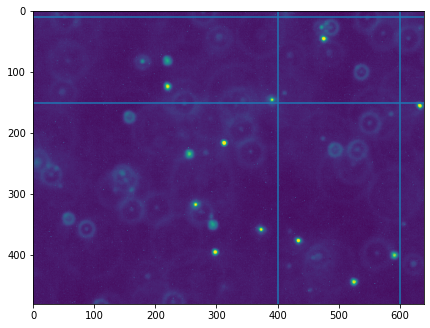

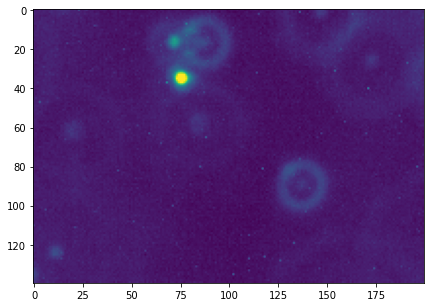

In [30]:
f = data[0,:,:] # extract the first frame

x_min = 400
x_max = 600
y_min = 10
y_max = 150

# Indicate cropping boundaries
plt.figure(figsize=(7,7))
plt.imshow(f)

plt.axvline(x_min)
plt.axvline(x_max)
plt.axhline(y_min)
plt.axhline(y_max)

f_cropped = data[0, y_min:y_max, x_min:x_max]

# Cropped figure
plt.figure(figsize=(7,7))
plt.imshow(f_cropped)

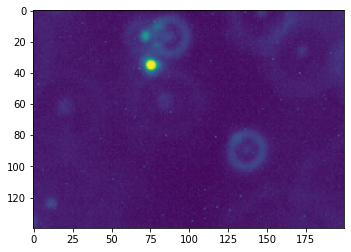

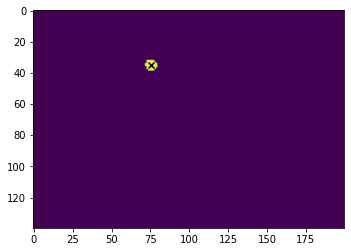

In [34]:
# Threshold value
t = 150

f = data[0, y_min:y_max, x_min:x_max]
plt.figure()
plt.imshow(f)

f_threshold = (f > t).astype(int)
plt.figure()
plt.imshow(f_threshold)

# Add code to determine blob coordinates
x, y = largest_blob_coords(f, t)
plt.scatter(x, y, color="black", marker="x")

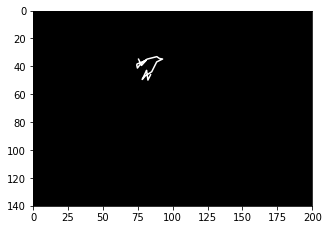

In [54]:
# Define some constants: number of frames to analyse, and threshold value
num_frames = 20
thresh = 150

# Create arrays for storing blob coordinates
x_pos_array = np.zeros(num_frames)
y_pos_array = np.zeros(num_frames)

# Loop through frames in defined range
for i in range(num_frames):
    
    # Extract current frame
    f = data[i, y_min:y_max, x_min:x_max]
    
    # Add code to obtain the x and y coordinates of the largest 
    # particle in the current frame
    x_pos, y_pos = largest_blob_coords(f, thresh)
    
    # Store the current coordinates in the corresponding position 
    x_pos_array[i] = x_pos
    y_pos_array[i] = y_pos


# Plot particle trajectory
plt.figure(figsize=(5,5))
ax = plt.gca()
ax.set_facecolor('k')

# Uncomment the following line to see the underlying image! (first frame)
#plt.imshow(data[0, y_min:y_max, x_min:x_max])

plt.plot(x_pos_array, y_pos_array, 'w-')
plt.xlim(0, x_max-x_min)
plt.ylim(0, y_max-y_min)

ax.invert_yaxis()
ax.set_aspect('equal')